# **TikTok Project**
## Hypothesis Testing

### Problem Summary

TikTok users have the ability to report videos and comments that contain user claims. **These reports identify content that needs to be reviewed by moderators.** This process generates a large number of user reports that are difficult to address quickly. 

The goal is to build a machine learning model with the capability to reliably classify user interaction data as a claim or opinion.. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

## Current Goal

Determine whether there is a statistically significant difference in the number of views for TikTok videos posted by verified accounts versus unverified accounts using **hypothesis testing**

##  **Data exploration and hypothesis testing**

### **Task 1. Imports and Data Loading**

Import packages and libraries needed to compute descriptive statistics and conduct a hypothesis test.

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for statistical analysis/hypothesis testing
from scipy import stats

Load the dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
df = pd.read_csv("tiktok_dataset.csv")

### **Task 2. Data exploration**

Use descriptive statistics to conduct Exploratory Data Analysis (EDA).



<details>
  <summary><h4><strong>Hint:</strong></h4></summary>

Refer back to *Self Review Descriptive Statistics* for this step-by-step proccess.

</details>

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
df = df.drop('#', axis = 1).copy()
df.head()

,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Generate a table of descriptive statistics about the data

df.describe()

,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [5]:
# Check for missing values

df.isna().sum()


claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [6]:
# Drop rows with missing values

df = df.dropna().copy()



In [7]:
# Display first few rows after handling missing values

df.head()


,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [8]:
df['claim_status'].value_counts(normalize = True)

claim      0.503458
opinion    0.496542
Name: claim_status, dtype: float64

In [9]:
df['verified_status'].value_counts(normalize = True)

not verified    0.93712
verified        0.06288
Name: verified_status, dtype: float64

### Almost 94% of the user accounts are not verified and the remaining 6% are verified

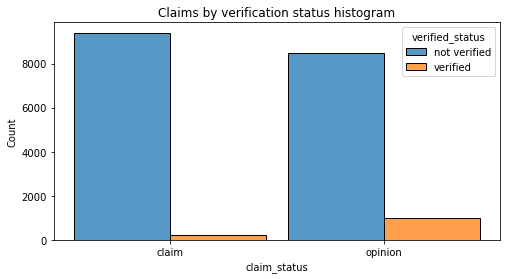

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(data=df,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('Claims by verification status histogram');

The verfied users are more likely to post opinions as compared to claims but the unverified accounts post a lot more claims.


In [11]:
# groupby and aggregate count
grouped = df.groupby(['verified_status', 'claim_status']).size().reset_index(name='count')

# pivot the table
pivot_table = grouped.pivot_table(index='verified_status', columns='claim_status', values='count', fill_value=0)


pivot_table

claim_status,claim,opinion
verified_status,,
not verified,9399,8485
verified,209,991


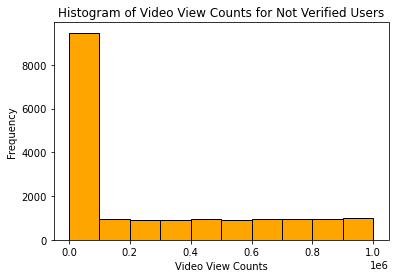

In [12]:
df[df['verified_status'] == 'not verified']['video_view_count'].plot(kind='hist', bins=10, color='orange', edgecolor='black')

# Adding labels and title
plt.xlabel('Video View Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Video View Counts for Not Verified Users')

# Display the plot
plt.show()

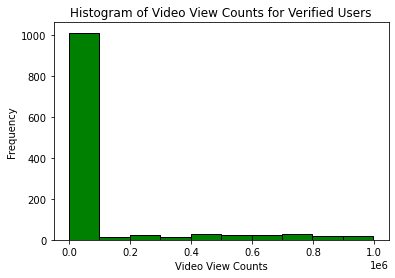

In [13]:
df[df['verified_status'] == 'verified']['video_view_count'].plot(kind='hist', bins=10, color='green', edgecolor='black')

# Adding labels and title
plt.xlabel('Video View Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Video View Counts for Verified Users')

# Display the plot
plt.show()

### A majority of the videos have less than 100,000 views for both the groups but the major difference is that for unverified accounts the videos with view counts upto 1 million (1,000,000) remain constant but die out for verified accounts

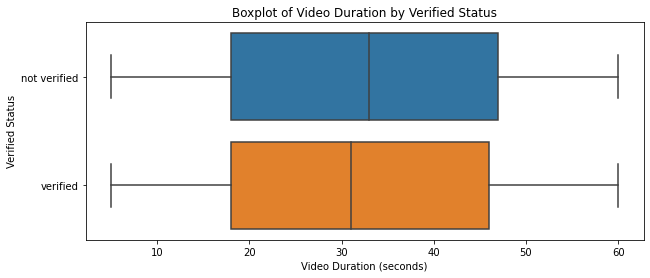

In [14]:
# Create a boxplot to visualize distribution of `video_duration_sec`
# Set the figure size
plt.figure(figsize=(10, 4))

# Create a boxplot
sns.boxplot(y='verified_status', x='video_duration_sec', data=df)

# Add title and labels
plt.title('Boxplot of Video Duration by Verified Status')
plt.ylabel('Verified Status')
plt.xlabel('Video Duration (seconds)')

# Show plot
plt.show()

The median duration of verified accounts is slightly lesser aroun 32 seconds as compared to 34 seconds for unverified accounts but on average the watch times remain the same indicating there is no significant difference 

**Note : tiktok videos have a minimum length of 15 seconds and a maximum of 60 seconds**

In [21]:
grouped_df = df.groupby('verified_status')['video_view_count'].agg(['median', 'mean', 'sum'])
    
print(grouped_df)

                  median           mean           sum
verified_status                                      
not verified     46723.0  265663.785339  4.751131e+09
verified          6023.5   91439.164167  1.097270e+08


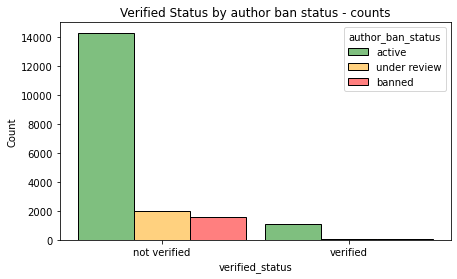

In [16]:
fig = plt.figure(figsize=(7,4))
sns.histplot(df, x='verified_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title('Verified Status by author ban status - counts');

### There are roughly the same number of under-review or banned authors for non-verified users (around 20 %) but for verified users those numbers are lower (around 10 %) indicating being verified leads to lesser bans 

In [17]:
# Assuming df is your DataFrame containing the data
# Group by 'author_ban_status' and 'verified_status' and count occurrences
grouped_df = df.groupby(['author_ban_status', 'verified_status']).size().reset_index(name='count')

# Create pivot table
pivot_table = grouped_df.pivot_table(index='author_ban_status', columns='verified_status', values='count', fill_value=0)

col_totals = pivot_table.sum(axis=0)

# Convert counts to percentages
pivot_table_percentage = (pivot_table / col_totals) * 100

print(pivot_table_percentage)

verified_status    not verified   verified
author_ban_status                         
active                79.987699  89.833333
banned                 8.890628   3.750000
under review          11.121673   6.416667


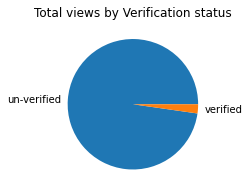

In [18]:
fig = plt.figure(figsize=(3,3))
plt.pie(df.groupby('verified_status')['video_view_count'].sum(), labels=['un-verified', 'verified'])
plt.title('Total views by Verification status');

### The unverified accounts have the majority of view as shown by the pie chart with almost 98% of the views and verified accounts have only around 2%

You are interested in the relationship between `verified_status` and `video_view_count`. One approach is to examine the mean value of `video_view_count` for each group of `verified_status` in the sample data.

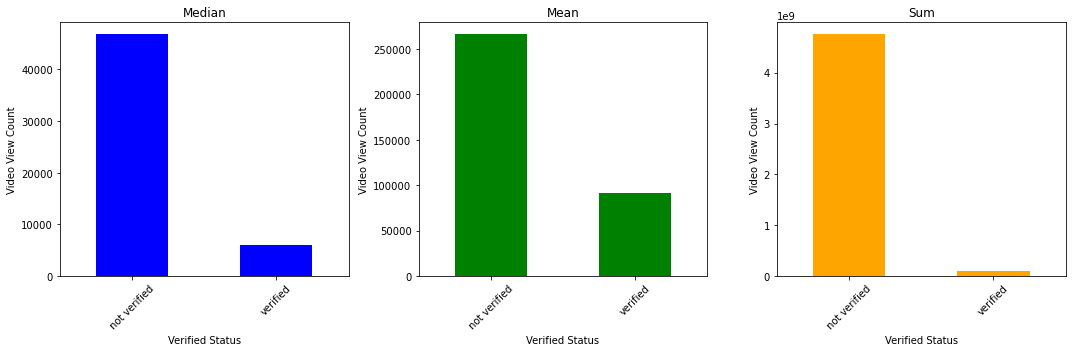

In [22]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot median
grouped_df['median'].plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Median')
axes[0].set_ylabel('Video View Count')
axes[0].set_xlabel('Verified Status')
axes[0].set_xticklabels(grouped_df.index, rotation=45) 

# Plot mean
grouped_df['mean'].plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Mean')
axes[1].set_ylabel('Video View Count')
axes[1].set_xlabel('Verified Status')
axes[1].set_xticklabels(grouped_df.index, rotation=45) 
# Plot sum
grouped_df['sum'].plot(kind='bar', ax=axes[2], color='orange')
axes[2].set_title('Sum')
axes[2].set_ylabel('Video View Count')
axes[2].set_xlabel('Verified Status')
axes[2].set_xticklabels(grouped_df.index, rotation=45) 
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### **Task 3. Hypothesis testing**


*   **Null hypothesis**: There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to chance or sampling variability).
*    **Alternative hypothesis**: There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).


### From the plots above we clearly see a large difference in statistics between verified and unverified users and their view counts and there is very small chance that these are just due to sampling variability 

We set the significance level at 95% 



#### P-value represents the probability of obtaining the observed data (or more extreme data) if the null hypothesis is true for a given probability distribution 

If p-value < $\alpha$ (0.05 for 95% SL or 0.01 for 99% SL) we can **reject the null hypothesis** can claim there is a statistical difference between groups A and B else we **fail to reject the null hypothesis** 

The significance level (often denoted by the Greek letter α) is the threshold below which you reject the null hypothesis. It is the probability of rejecting the null hypothesis when it is actually true.

A Type I **False Positive error** means rejecting the null hypothesis when it is actually true. In general, making a Type I error often leads to implementing changes that are unnecessary and ineffective, and which waste valuable time and resources.
*"We see differences when there are none"*

A Type II **False Negative error** means failing to reject a null hypothesis when it is actually false. In general, making a Type II error may result in missed opportunities for positive change and innovation. 
*"We fail to see differences when they are present"*




You choose 5% as the significance level and proceed with a two-sample t-test.

### 2 sample t-test
A two-sample t-test is a statistical test used to determine if the means of two independent groups are significantly different from each other. It is commonly used when comparing the means of two groups to assess whether there is evidence of a significant difference between them.

In [23]:
# Conduct a two-sample t-test to compare means
# Declare the 2 groups on which you wish the do t-test A and B

not_verified = df[df['verified_status'] == 'not verified']['video_view_count']
verified = df[df['verified_status'] == 'verified']['video_view_count']

In [24]:
# Implement a t-test using the two samples
stats.ttest_ind(a=not_verified, b=verified, equal_var=False)

Ttest_indResult(statistic=25.499441780633777, pvalue=2.6088823687177823e-120)

##  $p-value = 2.6 * 10^{-120} \approx 0 $

### This means we can safely reject the null hypothesis and claim there is a statistically significant difference between the 2 groups of verified and unverified users

## Step 4: Communicate insights

The analysis shows that there is a statistically significant difference in the average view counts between videos from verified accounts and videos from unverified accounts. This suggests there might be fundamental behavioral differences between these two groups of accounts.

It would be interesting to investigate the root cause of this behavioral difference. For example, do unverified accounts tend to post more clickbait-y videos? Or are unverified accounts associated with spam bots that help inflate view counts?
